In [1]:
import tables
import os

filename = '/home/tirocinio/Codice/tirocinio/Dati/DL0/acquisizione_2023_01_27/rpg0/dl0/wf_runId_00293_configId_00000_2023-01-27T14_32_51.090204.h5'

class Reader:
    def get_data_list(self,filename,startIndex=0,endIndex=-1):
        '''get data from h5 file starting by startIndex and ending at endIndex
        '''
        data_list = []
        with tables.open_file(filename,mode='r') as h5file:
            group = h5file.get_node('/waveforms')
            if endIndex == -1:
                endIndex = group._g_getnchildren()
            for i,data in enumerate(group):
                if i >= startIndex:
                    arr = data[:,-1]
                    data_list.append(arr)
                if i>=endIndex-1:
                    break
            return data_list
        
def create_directory(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"La directory '{directory_path}' è stata creata.")

In [2]:
reader = Reader()
data = reader.get_data_list(filename)

In [3]:
len(data)

10000

In [4]:
print(data[0:3])

[array([131, 134, 126, ..., 129, 127, 130], dtype=int16), array([130, 128, 135, ..., 130, 131, 137], dtype=int16), array([126, 131, 127, ..., 132, 135, 125], dtype=int16)]


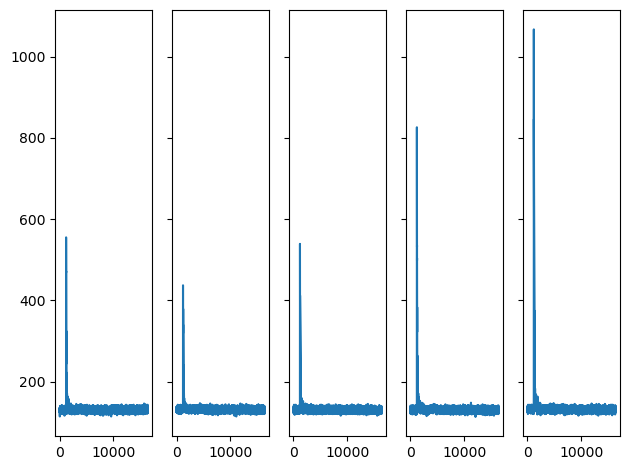

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True)
for i in range(5):
    #print(len(data[i]))
    axs[i].plot(data[i])

148306


/home/tirocinio/Codice/tirocinio/BBexponential/bb_exponential.py:252: RuntimeWarning: overflow encountered in exp
  return N_k*(np.log((a*N_k)/(1-np.exp(-a*T_k)))+a*S_k-1)
/home/tirocinio/Codice/tirocinio/BBexponential/bb_exponential.py:252: RuntimeWarning: divide by zero encountered in log
  return N_k*(np.log((a*N_k)/(1-np.exp(-a*T_k)))+a*S_k-1)
/nix/store/6jkzp4k9flx42l3ka9n4zyp7x05gcgri-python3-3.10.13-env/lib/python3.10/site-packages/scipy/optimize/_zeros_py.py:467: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


Tempo di Calcolo: 17.49377703666687
Estremi: [  0.  194.5 316.5 999. ]
Blocco 0: a=-6.541072589495608e-05,gamma=129.60904230044267
Blocco 1: a=-0.009366818704853667,gamma=137.39765978502123
Blocco 2: a=-0.00015729883621332569,gamma=127.15509067445434


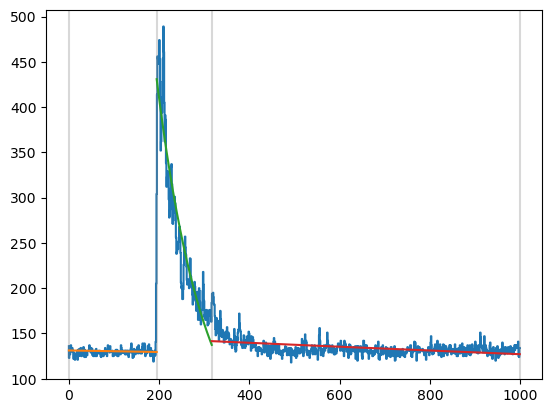

In [6]:
from astropy.stats import Events, bayesian_blocks
import numpy as np
from bb_exponential import ExponentialBlocks_Events, test_bb_exp
t=np.arange(0,1000)
x=data[7383][1000:2000]
print(sum(x))
test_bb_exp(t,x,ExponentialBlocks_Events,ncp_prior=400)

In [7]:
from astropy.stats import Events, bayesian_blocks
import numpy as np
from bb_exponential import ExponentialBlocks_Events, test_bb_exp

In [8]:
if False:
    t=np.arange(0,1000)
    for i in range(0,200):
        x=data[i][1000:2000]
        test_bb_exp(t,x,ExponentialBlocks_Events,save = True,name=f'outdir/wf_runId_00293_configId_00000_2023-01-27T14_32_51_090204_N_{sum(x)}_datanum_{i}.png')

In [9]:
N_list = [sum(data[i][1000:2000]) for i in range(len(data))]
estr_inf = min(N_list)
passo = (max(N_list)-min(N_list))*(1/100)
a = [[data[i] for i in range(len(N_list)) if estr_inf+n*passo<=N_list[i]<=estr_inf+(n+1)*passo] for n in range(100)]

In [10]:
print(estr_inf)
print(passo)
print(len(a))
print([len(b) for b in a])

131254
25450.850000000002
100
[6013, 2172, 747, 368, 243, 89, 63, 32, 22, 8, 12, 8, 11, 5, 9, 6, 9, 7, 5, 3, 7, 6, 6, 5, 9, 5, 2, 5, 2, 5, 9, 2, 6, 4, 4, 9, 3, 5, 3, 5, 6, 7, 6, 6, 7, 4, 2, 3, 0, 3, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


In [ ]:
from random import randint
t=np.arange(0,1000)
#for i in range(0,len(a[4])):
for i in range(100):
    index = randint(0,9999)
    print(index)
    x=data[index][1000:2000]
    print(sum(x))
    test_bb_exp(t,x,ExponentialBlocks_Events)